In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
data_df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
data_df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


[Text(0, 0, '561'), Text(0, 0, '629')]

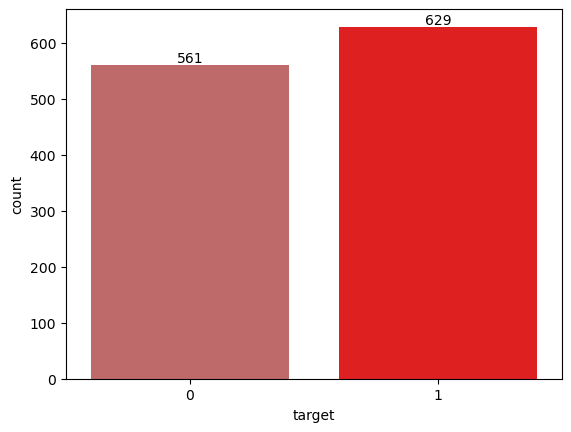

In [5]:
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= data_df["target"], palette= cols)
ax.bar_label(ax.containers[0])

<AxesSubplot:>

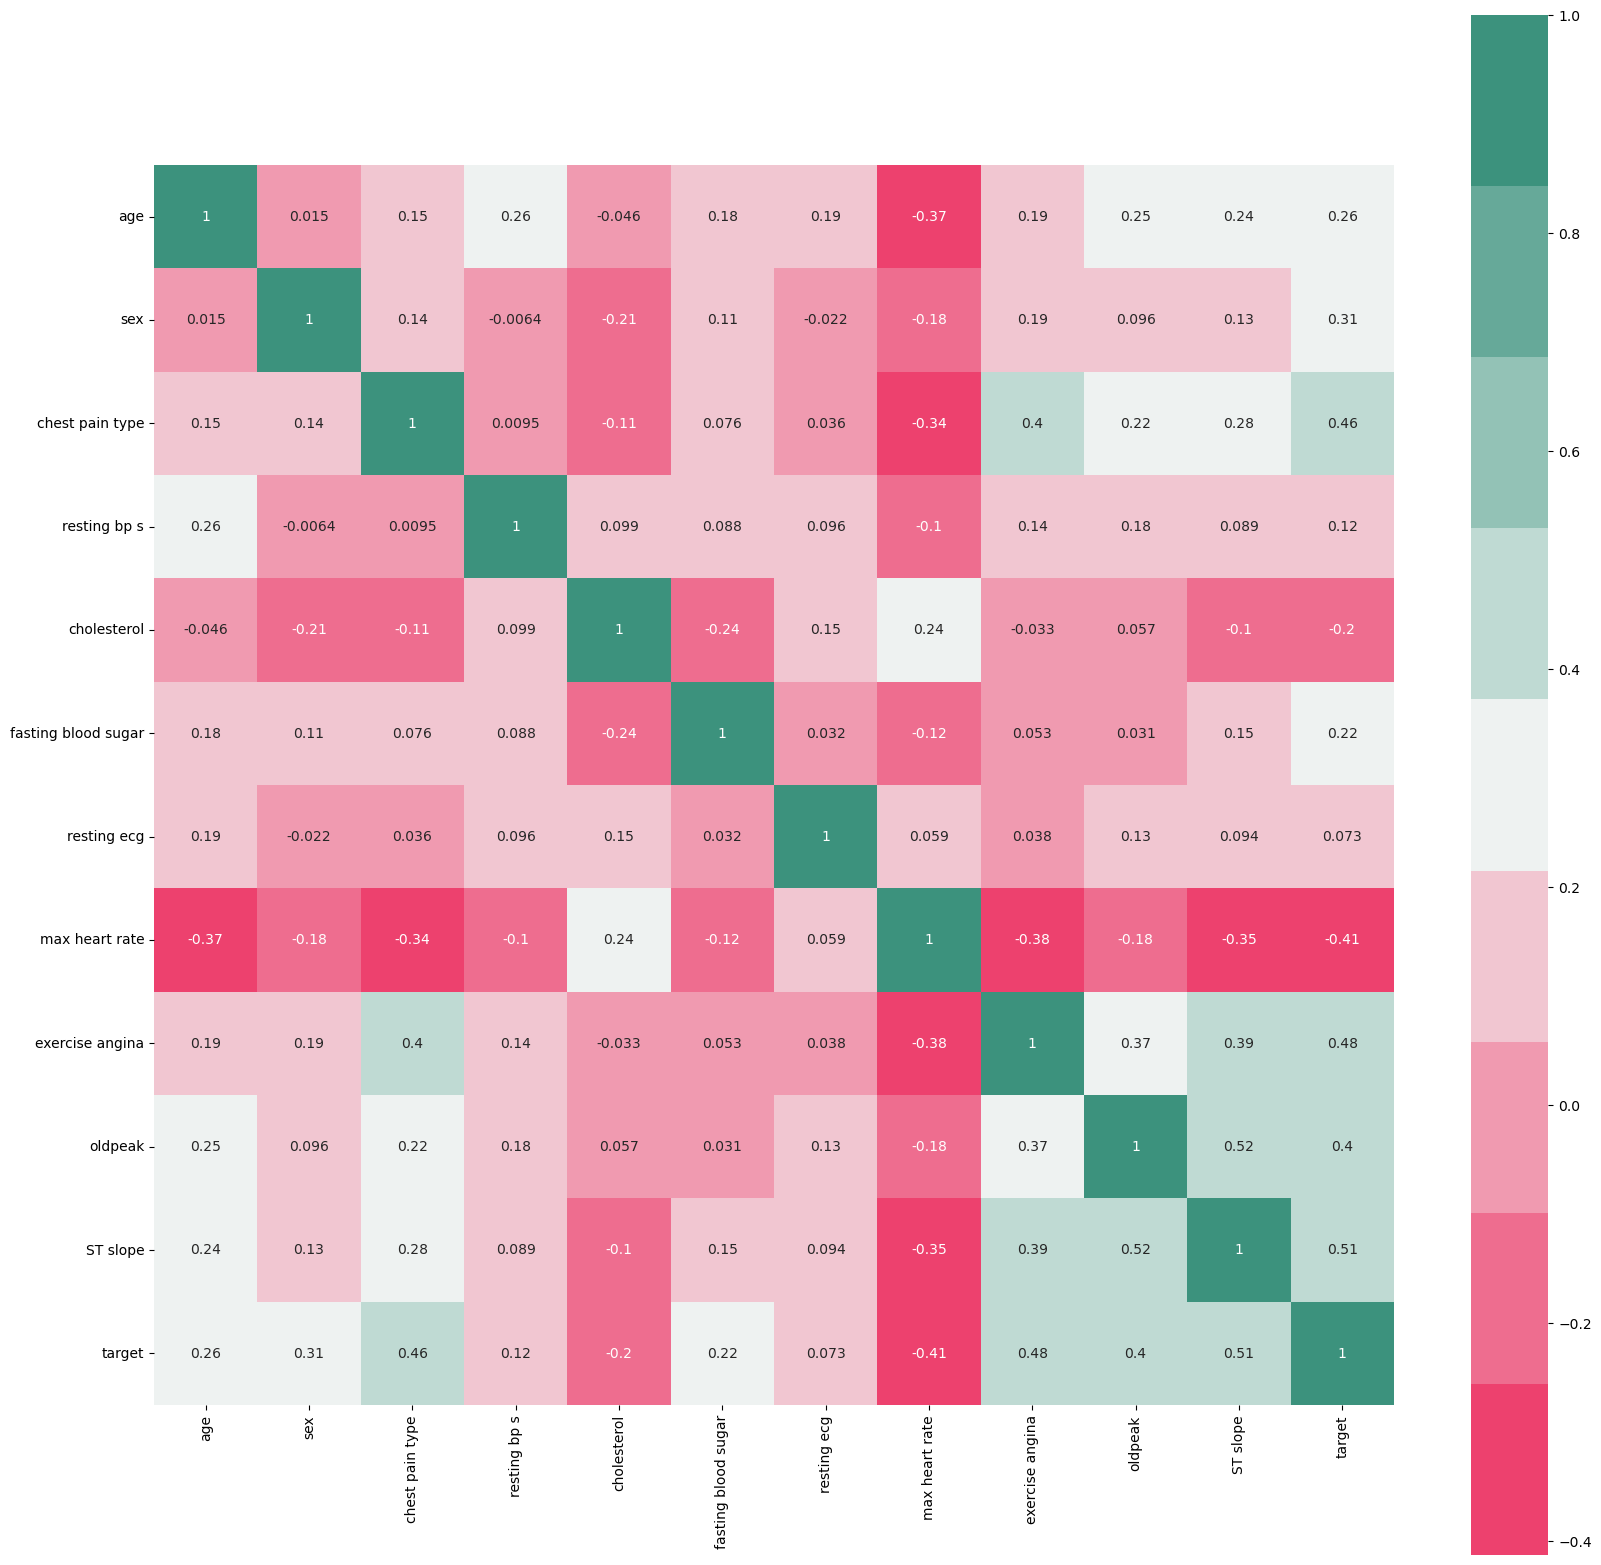

In [6]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
corrmat = data_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [7]:
X=data_df.drop(["target"],axis=1)
y=data_df["target"]

In [8]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,5.597763e-19,1.00042,-2.749564,-0.718406,0.029915,0.671333,2.488685
sex,1190.0,7.061578e-16,1.00042,-1.798576,0.555995,0.555995,0.555995,0.555995
chest pain type,1190.0,-8.977413e-16,1.00042,-2.387770,-0.248932,0.820487,0.820487,0.820487
resting bp s,1190.0,2.470013e-16,1.00042,-7.197486,-0.661931,-0.117301,0.427328,3.695106
cholesterol,1190.0,-1.115821e-16,1.00042,-2.075047,-0.220599,0.183828,0.585790,3.872997
fasting blood sugar,1190.0,-7.654008e-16,1.00042,-0.520929,-0.520929,-0.520929,-0.520929,1.919646
resting ecg,1190.0,-1.638652e-15,1.00042,-0.802672,-0.802672,-0.802672,1.496197,1.496197
max heart rate,1190.0,-1.210610e-15,1.00042,-3.125928,-0.734419,0.030079,0.794578,2.441190
exercise angina,1190.0,-4.215116e-16,1.00042,-0.795219,-0.795219,-0.795219,1.257515,1.257515
oldpeak,1190.0,-9.833404e-17,1.00042,-3.244162,-0.849792,-0.297245,0.623666,4.859859


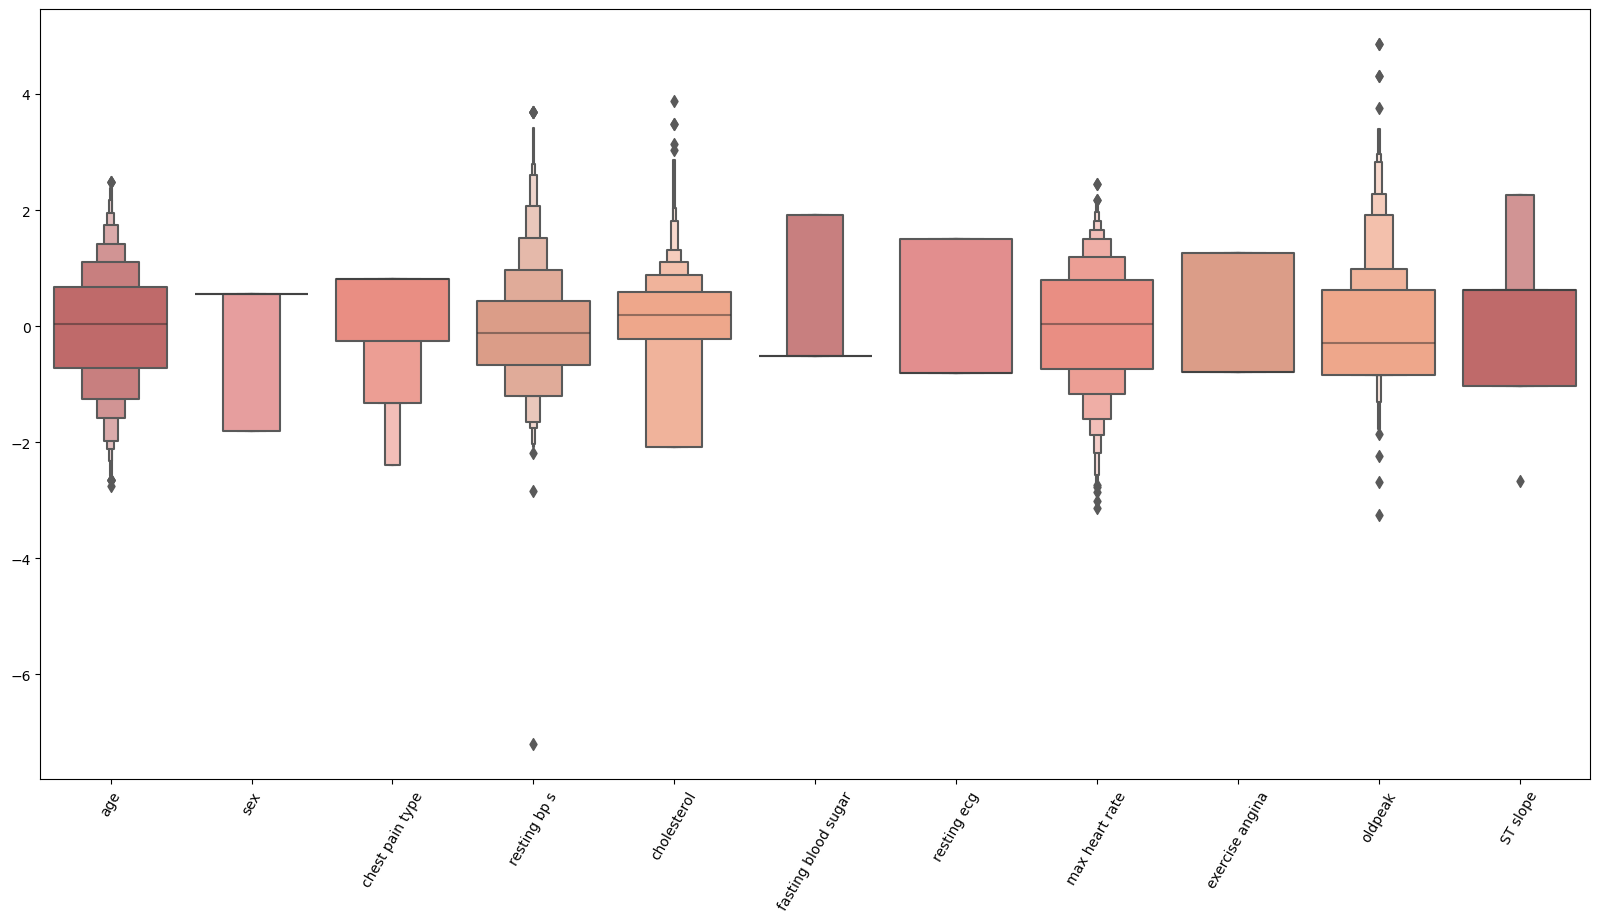

In [9]:
colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

# ANN

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [13]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 16s 1us/step


In [14]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


In [15]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [16]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2598 - accuracy: 0.9224 - val_loss: 0.1410 - val_accuracy: 0.9557
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1056 - accuracy: 0.9685 - val_loss: 0.0873 - val_accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9774 - val_loss: 0.0851 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9833 - val_loss: 0.0685 - val_accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9878 - val_loss: 0.0662 - val_accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.0640 - val_accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0234 - accuracy: 0.9930 - val_loss: 0.0637 - val_accuracy:

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])


Test accuracy: 0.9815999865531921


In [19]:
x_new = x_test[:10]
y_new = model.predict(x_new)

1/1 [==============================] - 0s 82ms/step


# CNN

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.datasets import mnist

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [26]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 63s 134ms/step - loss: 0.4879 - accuracy: 0.8475 - val_loss: 0.1460 - val_accuracy: 0.9557
Epoch 2/10
469/469 [==============================] - 66s 140ms/step - loss: 0.1918 - accuracy: 0.9422 - val_loss: 0.0783 - val_accuracy: 0.9743
Epoch 3/10
469/469 [==============================] - 61s 129ms/step - loss: 0.1249 - accuracy: 0.9626 - val_loss: 0.0557 - val_accuracy: 0.9825
Epoch 4/10
469/469 [==============================] - 64s 136ms/step - loss: 0.1002 - accuracy: 0.9703 - val_loss: 0.0523 - val_accuracy: 0.9835
Epoch 5/10
469/469 [==============================] - 65s 138ms/step - loss: 0.0828 - accuracy: 0.9740 - val_loss: 0.0437 - val_accuracy: 0.9845
Epoch 6/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0716 - accuracy: 0.9784 - val_loss: 0.0388 - val_accuracy: 0.9873
Epoch 7/10
469/469 [==============================] - 65s 138ms/step - loss: 0.0626 - accuracy: 0.9806 - val_loss: 0.0385 - val_ac

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])


Test accuracy: 0.9894000291824341
